# EASC 305: Classification 

This script is for the classification lecture. Script and example taken from Trauth, M.H. 2006. Matlab
Recipes for Earth Sciences, Springer-Verlag, Ch. 9.

# Demo 1: Principal Component Analysis (PCA)

In [12]:
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.linalg as LA
import matplotlib.pyplot as plt

np.set_printoptions(precision=5,linewidth=150)

In [2]:
cols = ['amp','pyr','pla','ksp','qtz','cla','flu','sph','gal']
data = np.loadtxt('sediments.txt', skiprows=1)
m, n = data.shape

print(cols)
print(data)
print('')
print(m)
print(n)

['amp', 'pyr', 'pla', 'ksp', 'qtz', 'cla', 'flu', 'sph', 'gal']
[[0.1702 0.1906 0.3079 0.0941 0.0286 0.     0.0767 0.0577 0.0742]
 [0.1357 0.191  0.2532 0.1248 0.106  0.0275 0.0621 0.0331 0.0665]
 [0.0885 0.1016 0.1791 0.116  0.1185 0.0174 0.1673 0.0789 0.1328]
 [0.0736 0.12   0.1554 0.1269 0.2309 0.0655 0.0916 0.063  0.0731]
 [0.0073 0.0645 0.0737 0.1407 0.2009 0.0278 0.2212 0.0937 0.1701]
 [0.0549 0.0161 0.0626 0.171  0.3922 0.0859 0.1193 0.0376 0.0604]
 [0.0805 0.0465 0.0998 0.1848 0.3848 0.1157 0.0722 0.0157 0.    ]
 [0.2191 0.2266 0.323  0.0877 0.0396 0.     0.0559 0.0317 0.0164]
 [0.1694 0.1608 0.2352 0.1217 0.0983 0.0301 0.0619 0.0599 0.0627]
 [0.2318 0.2116 0.3768 0.102  0.0339 0.007  0.0286 0.001  0.0074]]

10
9


In [3]:
sample = []

for i in range(m):
    sample.append('Samp.0{}'.format(i))

Element $r_{i,j}$ of the _correlation matrix_ computed from the columns of original sample-measurement matrix: 
$$
r_{i,j} = \frac{ \sum_{i=1}^{N} (x_i - \bar x_i)(y_i - \bar y_i)}{(N-1) s_{xi} s_{yi}}
$$
where: 
  - $x = i^{\rm th} $ column
  - $y = j^{\rm th} $ column

In [4]:
R = np.corrcoef(data,rowvar=False)

print(R)

[[ 1.       0.8852   0.95189 -0.71783 -0.74213 -0.59334 -0.80902 -0.57259 -0.63108]
 [ 0.8852   1.       0.9585  -0.88619 -0.90916 -0.78389 -0.62897 -0.28775 -0.33104]
 [ 0.95189  0.9585   1.      -0.85046 -0.87768 -0.75095 -0.68857 -0.42458 -0.43776]
 [-0.71783 -0.88619 -0.85046  1.       0.95764  0.93343  0.28665 -0.0711  -0.01388]
 [-0.74213 -0.90916 -0.87768  0.95764  1.       0.95342  0.30308 -0.03752 -0.02593]
 [-0.59334 -0.78389 -0.75095  0.93343  0.95342  1.       0.06698 -0.19285 -0.22577]
 [-0.80902 -0.62897 -0.68857  0.28665  0.30308  0.06698  1.       0.80652  0.89251]
 [-0.57259 -0.28775 -0.42458 -0.0711  -0.03752 -0.19285  0.80652  1.       0.92533]
 [-0.63108 -0.33104 -0.43776 -0.01388 -0.02593 -0.22577  0.89251  0.92533  1.     ]]


<IPython.core.display.Javascript object>


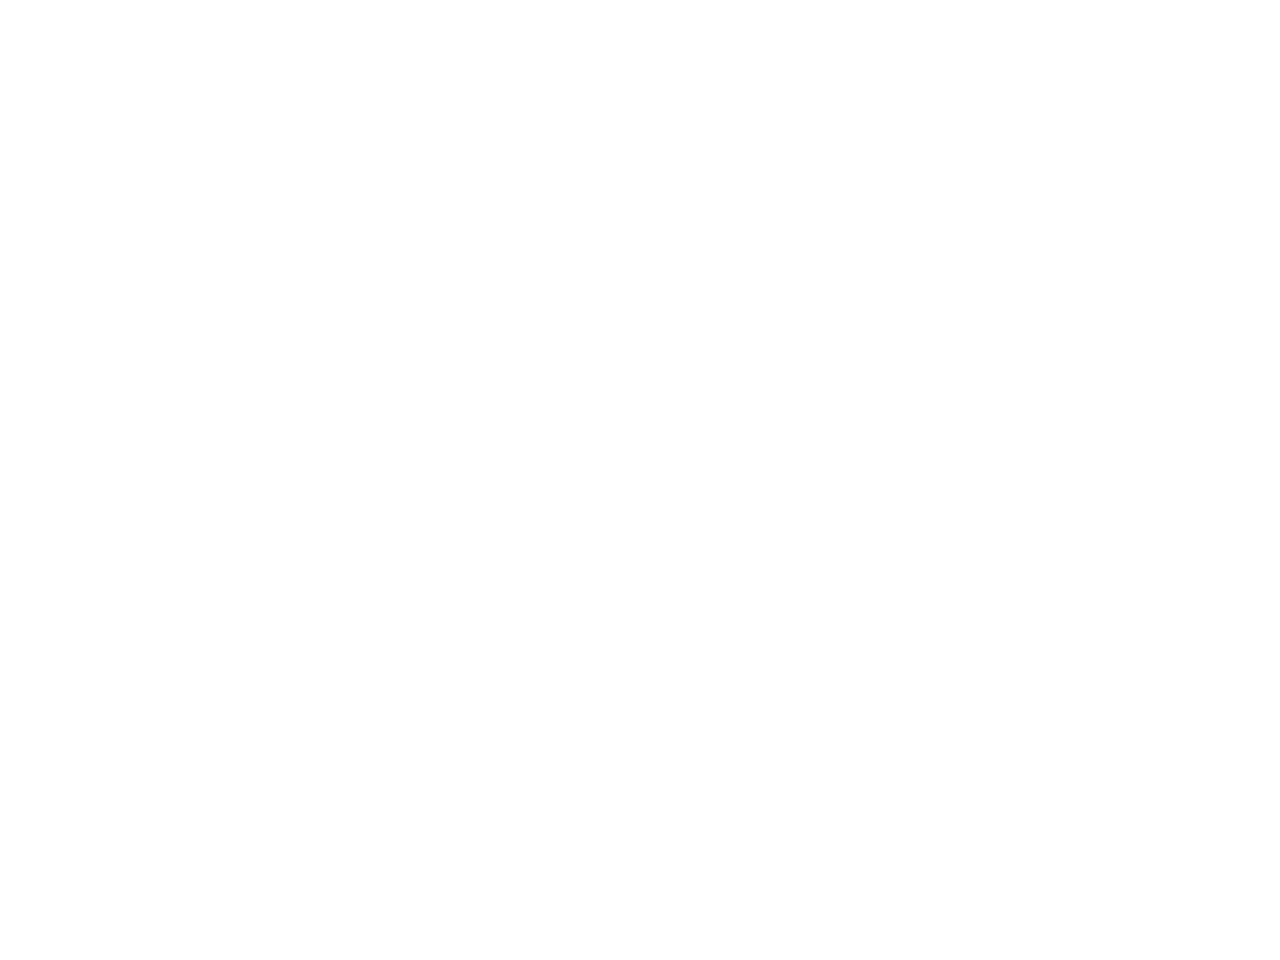

In [5]:
fig, ax = plt.subplots()
im = ax.imshow(R)

ax.set_xticks(np.arange(0,9))
ax.set_xticklabels(cols)

ax.set_yticks(np.arange(0,9))
ax.set_yticklabels(cols)

ax.set_title('Correlation Matrix');
fig.colorbar(im,ax=ax);

Compute the eigenvalues $w$ and eigenvectors $v$ of the correlation matrix $R$: 

In [6]:
w, v = LA.eig(R)

print(w)
print('')
print(v)

# convert to real numbers for imaginary values that are close
w = np.real_if_close(w)
v = np.real_if_close(v)

print('')
print(w)
print('')
print(v)

[5.79082e+00+0.j 2.86820e+00+0.j 1.73335e-01+0.j 7.61933e-02+0.j 5.03489e-02+0.j 4.26346e-12+0.j 2.31964e-03+0.j 2.39195e-02+0.j 1.48593e-02+0.j]

[[-0.39982  0.12375 -0.04992 -0.44247  0.52211 -0.32525  0.45415 -0.15296  0.1361 ]
 [-0.40394 -0.07117  0.24129  0.47531 -0.34079 -0.32814  0.09668 -0.55344  0.09041]
 [-0.41328 -0.00481 -0.11633  0.08242  0.05474 -0.48633 -0.42665  0.42875 -0.45108]
 [ 0.35542  0.28347 -0.13931  0.40567  0.60978 -0.13978 -0.28774 -0.36177 -0.06561]
 [ 0.36322  0.27962  0.02398 -0.20651 -0.28881 -0.60288 -0.16598  0.12124  0.50749]
 [ 0.31012  0.37768  0.39892  0.05952 -0.11025 -0.17048  0.48185  0.11193 -0.55909]
 [ 0.29299 -0.39165 -0.53798 -0.25515 -0.21448 -0.25783  0.1053  -0.37534 -0.37656]
 [ 0.17388 -0.50683  0.67275 -0.29062  0.22237 -0.12685 -0.28886 -0.14321 -0.07965]
 [ 0.1889  -0.51783 -0.06794  0.45956  0.21311 -0.23536  0.40659  0.40863  0.21738]]

[5.79082e+00 2.86820e+00 1.73335e-01 7.61933e-02 5.03489e-02 4.26346e-12 2.31964e-03 2.39195e-0

Verify that sum of squares of weighting coefficients in each eigenvector of principal component sum to 1

In [7]:
for j in range(n-1):
    print( np.sum(v[:,j]**2))

0.9999999999999999
1.0
1.0
1.0
1.0
1.0000000000000002
0.9999999999999998
1.0


Calculate percent variance explained by each principal component:

In [8]:
var_explained = (100*w) / np.sum(w)
print(var_explained)

[6.43425e+01 3.18689e+01 1.92594e+00 8.46593e-01 5.59432e-01 4.73718e-11 2.57737e-02 2.65772e-01 1.65103e-01]


Sort eigenvalues and vectors according to eigenvalues

In [9]:
# np.argsort only sorts in ascending values. So, we reverser the order array of 
# the array by indexing [::-1], which should be though of as using a reverse stride
idx = np.argsort(w)[::-1]

print(idx)
print('')

w   = w[idx]
v   = v[:,idx]

print(w)
print('')
print(v)

[0 1 2 3 4 7 8 6 5]

[5.79082e+00 2.86820e+00 1.73335e-01 7.61933e-02 5.03489e-02 2.39195e-02 1.48593e-02 2.31964e-03 4.26346e-12]

[[-0.39982  0.12375 -0.04992 -0.44247  0.52211 -0.15296  0.1361   0.45415 -0.32525]
 [-0.40394 -0.07117  0.24129  0.47531 -0.34079 -0.55344  0.09041  0.09668 -0.32814]
 [-0.41328 -0.00481 -0.11633  0.08242  0.05474  0.42875 -0.45108 -0.42665 -0.48633]
 [ 0.35542  0.28347 -0.13931  0.40567  0.60978 -0.36177 -0.06561 -0.28774 -0.13978]
 [ 0.36322  0.27962  0.02398 -0.20651 -0.28881  0.12124  0.50749 -0.16598 -0.60288]
 [ 0.31012  0.37768  0.39892  0.05952 -0.11025  0.11193 -0.55909  0.48185 -0.17048]
 [ 0.29299 -0.39165 -0.53798 -0.25515 -0.21448 -0.37534 -0.37656  0.1053  -0.25783]
 [ 0.17388 -0.50683  0.67275 -0.29062  0.22237 -0.14321 -0.07965 -0.28886 -0.12685]
 [ 0.1889  -0.51783 -0.06794  0.45956  0.21311  0.40863  0.21738  0.40659 -0.23536]]


Convert data to standardized form and compute PCs:

In [10]:
Zd = data - np.ones((m,1))*data.mean(axis=0)  # Subtract the mean
Z  = Zd / (np.ones((m,1)) *data.std( axis=0)) # Divide by the variance
newdata = np.dot(Z,v)                         # Project data into PC space

Plot original data, weights/loads (eigenvectors), projection of data onto PCs (scores). Demo different colormaps.

<IPython.core.display.Javascript object>


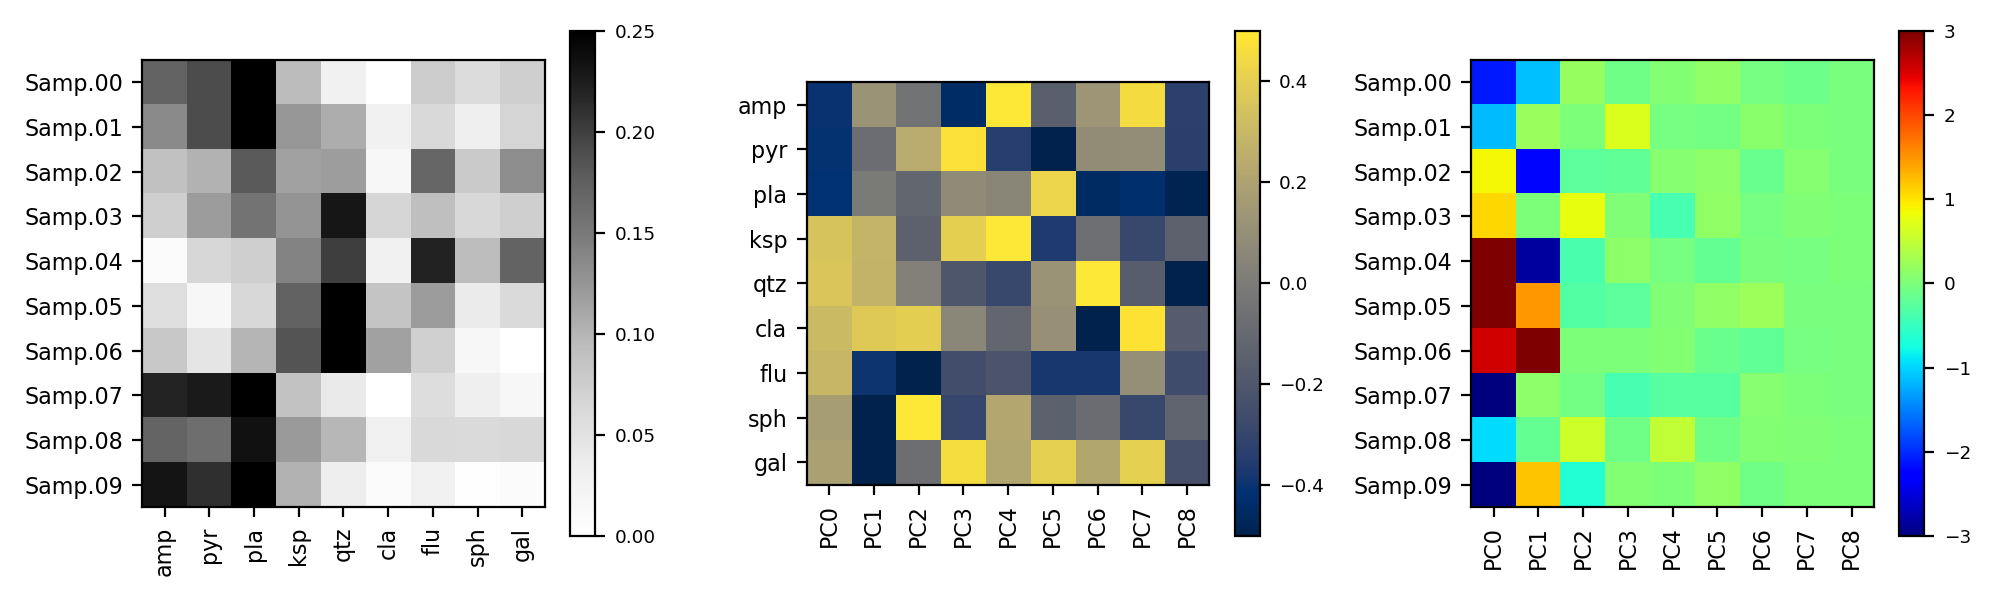

In [20]:
fig2, ax = plt.subplots(1,3,figsize=(10,3))

plt.rcParams['font.size'] = '8'

# Original data: mineral compositions of samples

org  = ax[0].imshow(data,cmap='Greys',clim=(0,0.25))
cbar = fig2.colorbar(org,ax=ax[0])
cbar.ax.tick_params(labelsize='small')

ax[0].set_yticks(np.arange(0,10))
ax[0].set_yticklabels(sample)

ax[0].set_xticks(np.arange(0,9))
ax[0].set_xticklabels(cols,rotation=90)

# Weights or loads of each mineral in each principal component (eigenvectors): 

load = ax[1].imshow(v, cmap='cividis',clim=(-0.5,0.5))
cbar = fig2.colorbar(load,ax=ax[1])
cbar.ax.tick_params(labelsize='small')

ax[1].set_yticks(np.arange(0,9))
ax[1].set_yticklabels(cols)

ax[1].set_xticks(np.arange(0,9))
ax[1].set_xticklabels(['PC{}'.format(i) for i in range(0,9)],rotation=90)

# Projection of data (the samples) onto principal components (scores): 

proj = ax[2].imshow(newdata,cmap='jet',clim=(-3,3))
cbar = fig2.colorbar(proj,ax=ax[2])
cbar.ax.tick_params(labelsize='small')

ax[2].set_yticks(np.arange(0,10))
ax[2].set_yticklabels(sample)
ax[2].set_xticks(np.arange(0,9))
ax[2].set_xticklabels(['PC{}'.format(i) for i in range(0,9)],rotation=90)

fig2.tight_layout()

In [ ]:
fig3, ax = plt.subplots(1,2,figsize=(8,5))

# Plot first two principal component loads (weighting of original variables):

ax[0].scatter(v[:,0],v[:,1])
ax[0].set_ylim(-0.6, 0.6)
ax[0].set_xlim(-0.6, 0.6)
ax[0].axhline(0,color='k',lw=0.75)
ax[0].axvline(0,color='k',lw=0.75)
ax[0].set_xlabel('1st principal component load')
ax[0].set_ylabel('2nd principal component load')
ax[0].grid()

for i in range(v.shape[0]):
    ax[0].text(v[i,0]+0.01,v[i,1]+0.01,cols[i])

# Plot projection of samples onto first two principal components:

ax[1].scatter(newdata[:,0],newdata[:,1])
ax[1].set_ylim(-4.0, 4.0)
ax[1].set_xlim(-4.0, 4.0)
ax[1].axhline(0,color='k',lw=0.75)
ax[1].axvline(0,color='k',lw=0.75)
ax[1].set_xlabel('1st principal component score')
ax[1].set_ylabel('2nd principal component score')
ax[1].grid()

for i in range(newdata.shape[0]):
    ax[1].text(newdata[i,0]+0.01,newdata[i,1]+0.01,sample[i])